In [56]:
## Imports & options
import pandas as pd
import os, torch
torch.manual_seed(42)

pd.set_option('display.max_colwidth', None)
FILE_NAME = "eng_laptop_train_alltasks.jsonl"

file_name = os.path.join('data', FILE_NAME)


In [57]:
def convert_df(data):
	quadruplet_data = []
	c = 0
	for index, row in data.iterrows():
		for quad in row['Quadruplet']:
			quadruplet_data.append({
				'ID': row['ID'],
				'Text': row['Text'],
				'Aspect': quad['Aspect'],
				'Category': quad['Category'],
				'TOPIC': quad['Category'].split('#')[0],
				'Opinion': quad['Opinion'],
				#'VA': quad['VA'],
				'Valence': float(quad['VA'].split('#')[0]),
				'Arousal': float(quad['VA'].split('#')[1]),
			})
	quadruplet_data = pd.DataFrame(quadruplet_data)
	return quadruplet_data

In [58]:
data = pd.read_json(file_name, lines=True)
print(data.shape)
data = convert_df(data)
print(data.shape)
print('Quadruplet counts per review:\n', data.groupby('ID').size().value_counts())
display(data)

(4076, 3)
(5773, 8)
Quadruplet counts per review:
 1     2916
2      820
3      221
4       78
5       17
6       16
7        5
8        2
10       1
Name: count, dtype: int64


,ID,Text,Aspect,Category,TOPIC,Opinion,Valence,Arousal
0,laptop_quad_dev_1,"this unit is ` ` pretty ` ` and stylish , so my high school daughter was attracted to it for that reason .",unit,LAPTOP#DESIGN_FEATURES,LAPTOP,pretty,7.12,7.12
1,laptop_quad_dev_1,"this unit is ` ` pretty ` ` and stylish , so my high school daughter was attracted to it for that reason .",unit,LAPTOP#DESIGN_FEATURES,LAPTOP,stylish,7.12,7.12
2,laptop_quad_dev_2,for now i ' m okay with upping the experience & device to 3 out of 5 stars .,device,LAPTOP#GENERAL,LAPTOP,NULL,5.50,5.25
3,laptop_quad_dev_3,"seems unlikely but whatever , i ' ll go with it .",NULL,LAPTOP#GENERAL,LAPTOP,NULL,5.00,5.12
4,laptop_quad_dev_4,this version has been my least favorite version i ' ve had for the following reasons listed bellow the pros .,version,LAPTOP#GENERAL,LAPTOP,least favorite,3.30,6.60
...,...,...,...,...,...,...,...,...
5768,laptop_quad_train_2932,"an awesome product , well built - well worth your time and money .",product,LAPTOP#QUALITY,LAPTOP,well worth,7.00,7.17
5769,laptop_quad_train_2933,backlit keyboard is great ; feels sturdy ; fast processing .,backlit keyboard,KEYBOARD#GENERAL,KEYBOARD,great,7.67,7.83
5770,laptop_quad_train_2933,backlit keyboard is great ; feels sturdy ; fast processing .,NULL,LAPTOP#DESIGN_FEATURES,LAPTOP,sturdy,7.83,8.17
5771,laptop_quad_train_2933,backlit keyboard is great ; feels sturdy ; fast processing .,NULL,CPU#OPERATION_PERFORMANCE,CPU,fast,8.00,8.33


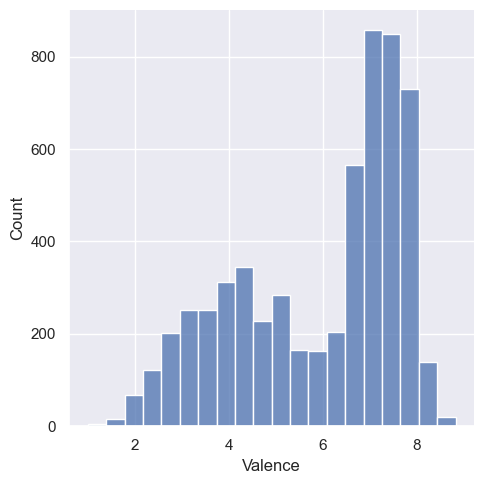

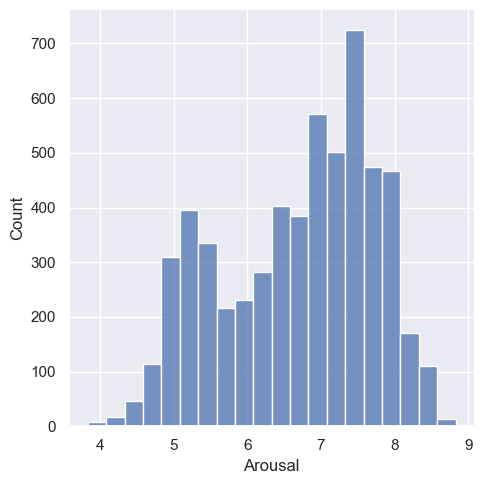

In [59]:
import seaborn as sns
sns.displot(data=data, x='Valence', bins=20)
sns.displot(data=data, x='Arousal', bins=20)

In [60]:
print('Rows:', data.shape)
for col in data.columns:
    print(f'{col:<20}: ({(data[col] == "NULL").sum():>2} null) [{data[col].dtype}]')
print('\nTopics count:', data['TOPIC'].value_counts().count())
print('\nCategory count:', data['Category'].value_counts().count())
data['TOPIC'].value_counts()

Rows: (5773, 8)
ID                  : ( 0 null) [object]
Text                : ( 0 null) [object]
Aspect              : (1254 null) [object]
Category            : ( 0 null) [object]
TOPIC               : ( 0 null) [object]
Opinion             : (1583 null) [object]
Valence             : ( 0 null) [float64]
Arousal             : ( 0 null) [float64]

Topics count: 23

Category count: 121


TOPIC
LAPTOP                2952
DISPLAY                514
KEYBOARD               504
BATTERY                259
SOFTWARE               231
OS                     184
HARDWARE               181
MULTIMEDIA_DEVICES     165
SUPPORT                149
PORTS                  106
COMPANY                 91
POWER_SUPPLY            84
CPU                     75
HARD_DISK               71
MEMORY                  65
SHIPPING                47
GRAPHICS                29
FANS_COOLING            27
WARRANTY                12
OUT_OF_SCOPE             9
OPTICAL_DRIVES           8
MOUSE                    6
MOTHERBOARD              4
Name: count, dtype: int64

In [65]:
bow = data['Text'].str.split().explode().value_counts()
display(pd.DataFrame(bow))

,count
Text,
.,5106
the,4563
",",4130
and,3314
it,2540
...,...
crowl,1
intermittently,1
reloading,1


In [64]:
import torch.utils.data as data_utils
import torch
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.7
train_dataset, val_dataset = train_test_split(data, test_size=TRAIN_SIZE, random_state=42)
train_dataset

,ID,Text,Aspect,Category,TOPIC,Opinion,Valence,Arousal
1956,laptop_quad_train_246,"- though the case is plastic , the keyboard area itself has a cold metallic feel .",case,LAPTOP#DESIGN_FEATURES,LAPTOP,NULL,5.38,5.25
3178,laptop_quad_train_1155,"the mac pro is also very fast , and i have only experienced the rainbow wheel once or twice whenever i was on a website that wasn ' t responding .",mac pro,LAPTOP#OPERATION_PERFORMANCE,LAPTOP,very fast,7.62,7.62
3192,laptop_quad_train_1164,love this mac book pro .,mac book pro,LAPTOP#GENERAL,LAPTOP,love,7.62,7.88
1307,laptop_quad_test_630,but asus engineers designed the case and laptop not to be opened by users .,laptop,LAPTOP#OPERATION_PERFORMANCE,LAPTOP,NULL,4.50,5.17
2003,laptop_quad_train_283,the screen looks good despite some other reviews .,screen,DISPLAY#GENERAL,DISPLAY,good,7.25,7.38
...,...,...,...,...,...,...,...,...
3772,laptop_quad_train_1595,"moreover i ' m quite upset because it seems amazon will not pay me back the shipping fees , which for me amount to about 100 $ as i live in france .",amazon,SHIPPING#GENERAL,SHIPPING,quite upset,2.90,4.90
5191,laptop_quad_train_2581,"this chromebook is great system that is lightweight , has excellent battery life , and offers a fantastic keyboard .",chromebook,LAPTOP#DESIGN_FEATURES,LAPTOP,lightweight,7.67,7.83
5226,laptop_quad_train_2597,love the feel and quality of this chromebook .,chromebook,LAPTOP#QUALITY,LAPTOP,love,7.30,7.00
5390,laptop_quad_train_2698,i have had my asus chromebook for several months and feel liberated from electronic hell .,asus chromebook,LAPTOP#GENERAL,LAPTOP,liberated,8.00,8.25
